<a href="https://colab.research.google.com/github/cpaterson1/CognoRise-Infotech/blob/main/Car%20Price/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

### Loading Dataset

In [4]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Visualisations

In [5]:
df_copy = df.copy()

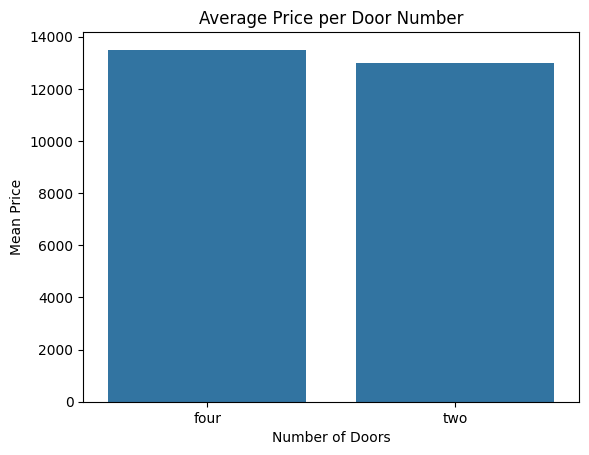

In [6]:
mean_price_per_door = df_copy.groupby('doornumber')['price'].mean().sort_index()
sns.barplot(x=mean_price_per_door.index, y=mean_price_per_door.values)
plt.xlabel('Number of Doors')
plt.ylabel('Mean Price')
plt.title('Average Price per Door Number')
plt.show()

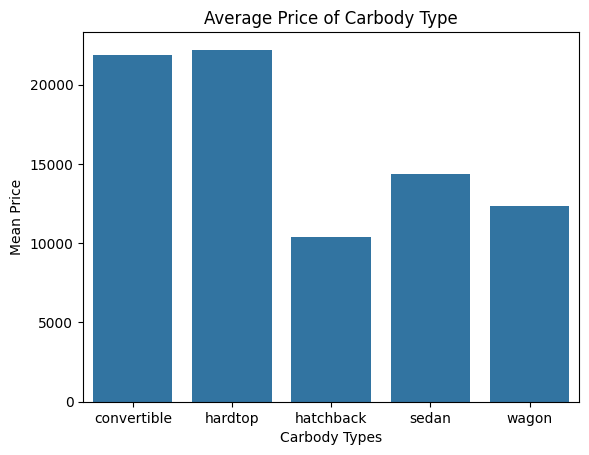

In [7]:
mean_price_carbody = df_copy.groupby('carbody')['price'].mean().sort_index()
sns.barplot(x=mean_price_carbody.index, y=mean_price_carbody.values)
plt.xlabel('Carbody Types')
plt.ylabel('Mean Price')
plt.title('Average Price of Carbody Type')
plt.show()

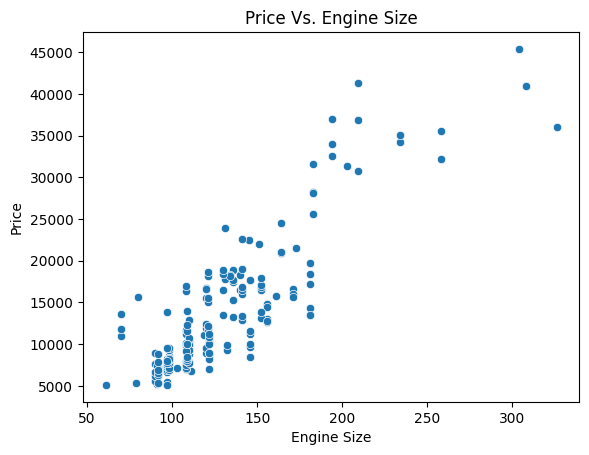

In [8]:
sns.scatterplot(data=df_copy, x='enginesize', y='price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Price Vs. Engine Size')
plt.show()

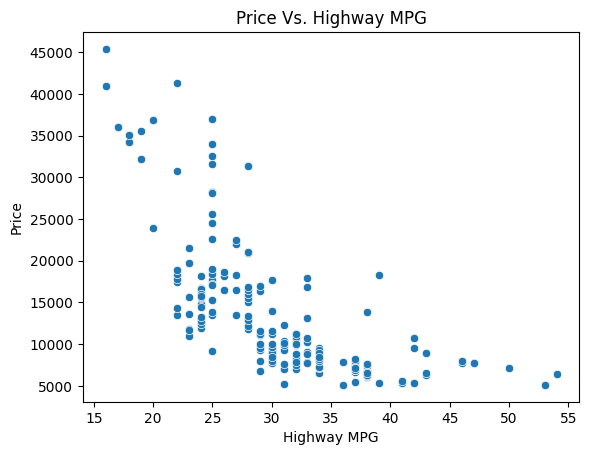

In [9]:
sns.scatterplot(data=df_copy, x='highwaympg', y='price')
plt.xlabel('Highway MPG')
plt.ylabel('Price')
plt.title('Price Vs. Highway MPG')
plt.show()

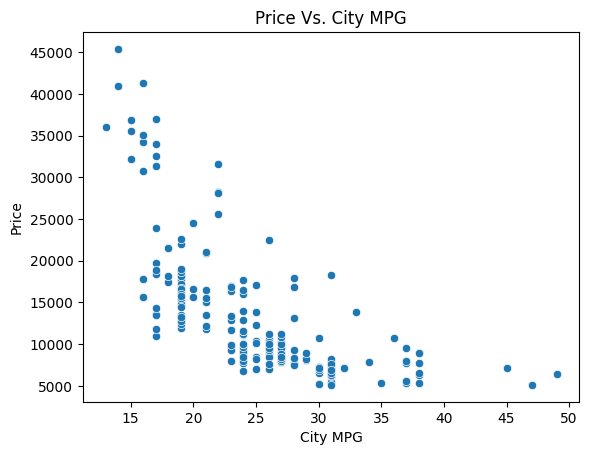

In [10]:
sns.scatterplot(data=df_copy, x='citympg', y='price')
plt.xlabel('City MPG')
plt.ylabel('Price')
plt.title('Price Vs. City MPG')
plt.show()

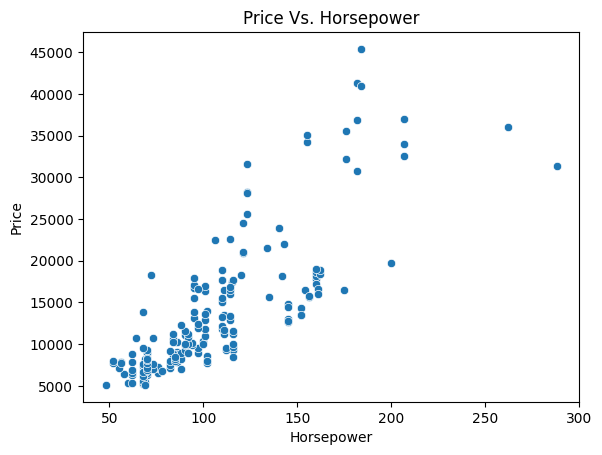

In [11]:
sns.scatterplot(data=df_copy, x='horsepower', y='price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Price Vs. Horsepower')
plt.show()

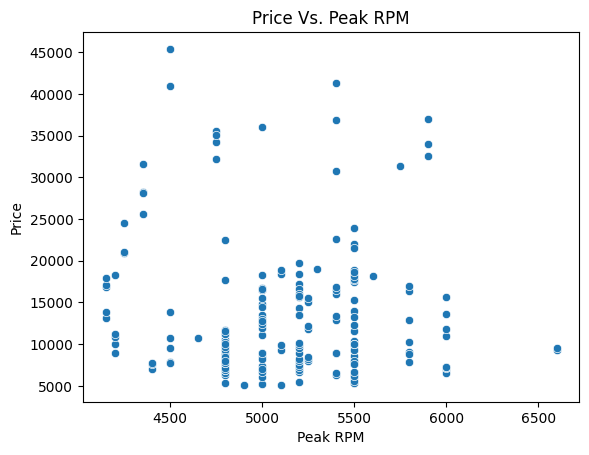

In [12]:
sns.scatterplot(data=df_copy, x='peakrpm', y='price')
plt.xlabel('Peak RPM')
plt.ylabel('Price')
plt.title('Price Vs. Peak RPM')
plt.show()

### Encoding Categorical Data

In [13]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [14]:
df['doornumber'].replace('two',2,inplace=True)
df['doornumber'].replace('four',4,inplace=True)
df['doornumber'].unique()

array([2, 4])

In [15]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [16]:
df['cylindernumber'].replace('two',2,inplace=True)
df['cylindernumber'].replace('four',4,inplace=True)
df['cylindernumber'].replace('six',6,inplace=True)
df['cylindernumber'].replace('five',5,inplace=True)
df['cylindernumber'].replace('three',3,inplace=True)
df['cylindernumber'].replace('twelve',12,inplace=True)
df['cylindernumber'].replace('eight',8,inplace=True)
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [18]:
label=preprocessing.LabelEncoder()

In [19]:
label.fit(df.fueltype)
df.fueltype=label.transform(df.fueltype)

In [20]:
label.fit(df.aspiration)
df.aspiration=label.transform(df.aspiration)

In [21]:
label.fit(df.carbody)
df.carbody=label.transform(df.carbody)

In [22]:
label.fit(df.drivewheel)
df.drivewheel=label.transform(df.drivewheel)

In [23]:
label.fit(df.enginelocation)
df.enginelocation=label.transform(df.enginelocation)

In [24]:
label.fit(df.enginetype)
df.enginetype=label.transform(df.enginetype)

In [25]:
label.fit(df.fuelsystem)
df.fuelsystem=label.transform(df.fuelsystem)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [27]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),1,0,4,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,1,1,4,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,1,0,4,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,0,1,4,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


### Feature Engineering

In [113]:
df['power_to_weight'] = df['horsepower'] / df['curbweight']
df['engine_volume'] = df['boreratio'] * df['stroke']
df['city_highway_mpg_ratio'] = df['citympg'] / df['highwaympg']
df['price_per_hp'] = df['price'] / df['horsepower']
df['price_to_enginesize'] = df['price'] / df['enginesize']
df['price_to_wheelbase'] = df['price'] / df['wheelbase']
df['price_per_unit_curbweight'] = df['price'] / df['curbweight']

### Correlation Heatmap

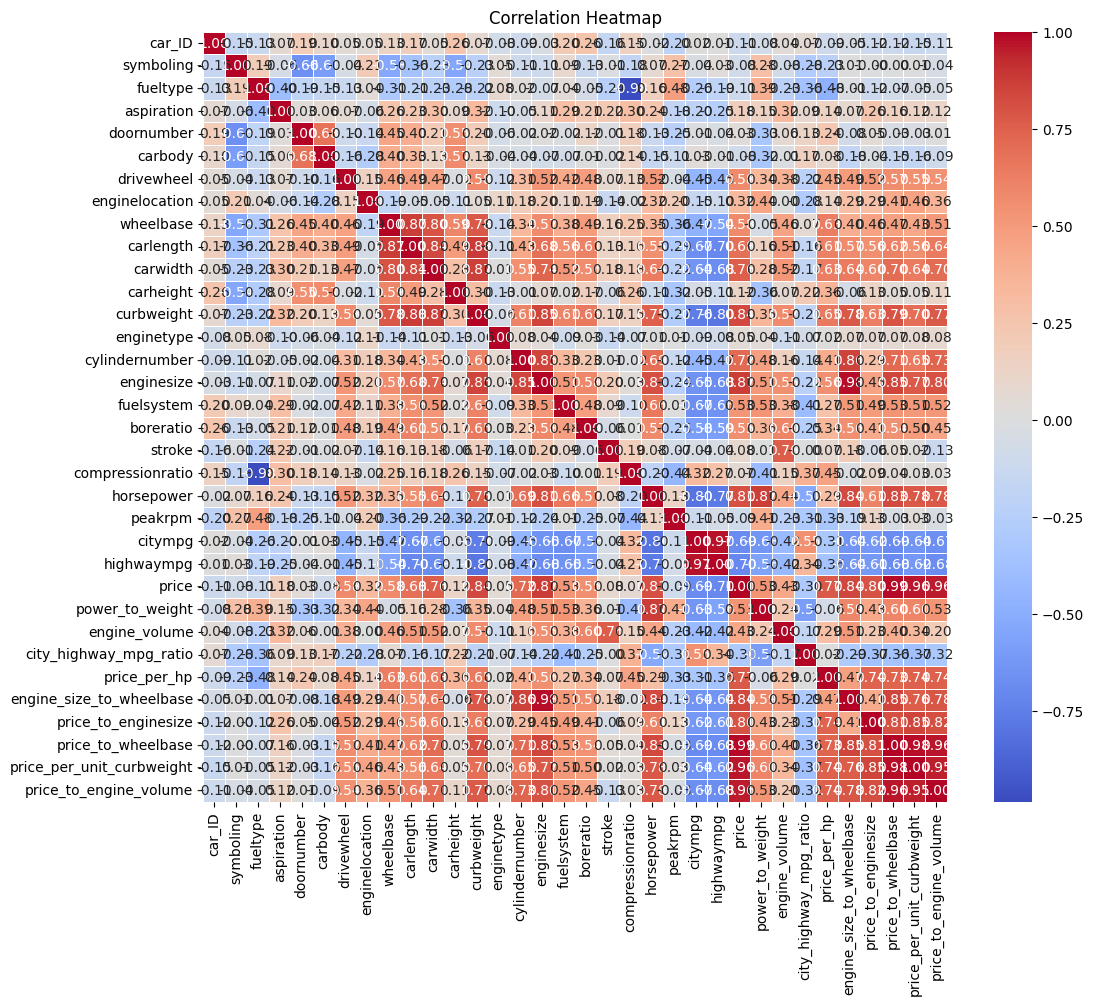

In [114]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Training

In [131]:
features = ['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
             'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower',
             'citympg', 'highwaympg', 'power_to_weight', 'engine_volume', 'city_highway_mpg_ratio',
             'price_per_hp', 'price_to_enginesize', 'price_to_wheelbase', 'price_per_unit_curbweight']
X = df[features]
y = df['price']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### Linear Regression Model

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [32]:
print(f"Mean Squared Error: {mse}")
print(" ")
print(f"R^2 Score: {r2}")
print(" ")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 15689421.284143258
 
R^2 Score: 0.8241805234461432
 
                Coefficient
drivewheel      1469.666686
wheelbase        -11.717948
carlength        -21.998008
carwidth         750.596666
curbweight         1.970489
cylindernumber   139.841455
enginesize        75.613294
fuelsystem      -163.448407
boreratio       -907.680951
horsepower        39.361130
citympg         -125.949710
highwaympg        37.900584


### Random Forest Model

In [144]:
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
preds = forest_model.predict(X_test)

r2 = r2_score(y_test, preds)
print(f'R^2 Score: {r2:.2f}')
print(" ")
rmse = mean_squared_error(y_test, preds, squared=False)
print(f'Root Mean Squared Error: {rmse:.2f}')
avg_target_value = (df['price'].min() + df['price'].max())/2
percent_rmse = (rmse/avg_target_value) * 100
print(f'Percentage of RMSE: {np.round(percent_rmse, 2)}%')
print(" ")
mae = mean_absolute_error(y_test, preds)
print(f'Mean Absolute Error: {mae:.2f}')
avg_target_value = (df['price'].min() + df['price'].max())/2
percent_mae = (mae/avg_target_value) * 100
print(f'Percentage of MAE: {np.round(percent_mae, 2)}%')

R^2 Score: 0.99
 
Root Mean Squared Error: 978.69
Percentage of RMSE: 3.87%
 
Mean Absolute Error: 514.15
Percentage of MAE: 2.04%


## Price Predictor

In [126]:
def predict_price(drivewheel, wheelbase, carlength, carwidth, curbweight,
                  cylindernumber, enginesize, fuelsystem, boreratio, horsepower,
                  citympg, highwaympg, power_to_weight, engine_volume, city_highway_mpg_ratio, price_per_hp,
                  price_to_enginesize, price_to_wheelbase, price_per_unit_curbweight):
    input_data = pd.DataFrame({
        'drivewheel': [drivewheel],
        'wheelbase': [wheelbase],
        'carlength': [carlength],
        'carwidth': [carwidth],
        'curbweight': [curbweight],
        'cylindernumber': [cylindernumber],
        'enginesize': [enginesize],
        'fuelsystem': [fuelsystem],
        'boreratio': [boreratio],
        'horsepower': [horsepower],
        'citympg': [citympg],
        'highwaympg': [highwaympg],
        'power_to_weight': [power_to_weight],
        'engine_volume': [engine_volume],
        'city_highway_mpg_ratio': [city_highway_mpg_ratio],
        'price_per_hp': [price_per_hp],
        'price_to_enginesize': [price_to_enginesize],
        'price_to_wheelbase': [price_to_wheelbase],
        'price_per_unit_curbweight': [price_per_unit_curbweight]
    })

    # Predict the price
    price_prediction = forest_model.predict(input_data)
    return price_prediction[0]

In [146]:
predicted_price = predict_price(drivewheel=2, wheelbase=112, carlength=199.2,
                                carwidth=72, curbweight=3715, cylindernumber=8,
                                enginesize=304, fuelsystem=5, boreratio=3.8,
                                horsepower=184, citympg=14, highwaympg=16, power_to_weight=0.049529,
                                engine_volume=12.73, city_highway_mpg_ratio=0.875,
                                price_per_hp=246.73913, price_to_enginesize=149.342105,
                                price_to_wheelbase=0.3443, price_per_unit_curbweight=0.192)

print(f"Predicted Price: ${predicted_price:.2f}")

Predicted Price: $6201.30
